In [4]:
import numpy as np
import matplotlib.pyplot as plt

time_step = 10000
slot_prob = [0.1, 0.15, 0.1, 0.65]

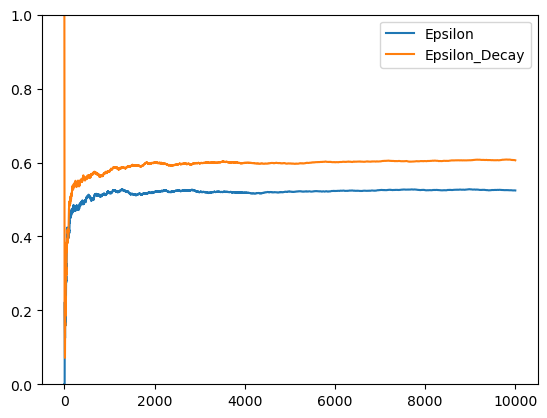

In [9]:
# 입실론 그리디
selected_eps = [0 for i in range(len(slot_prob))]
reward = [0 for i in range(len(slot_prob))]
avg_reward = [0 for i in range(len(slot_prob))]
total_reward = []

selected_decay = [0 for i in range(len(slot_prob))]
reward_decay = [0 for i in range(len(slot_prob))]
avg_reward_decay = [0 for i in range(len(slot_prob))]
total_reward_decay = []

eps = 0.7
eps_decay = 0.9
rate = 0.98

for i in range(time_step):

    # get act by eps
    if eps < np.random.rand():
        act = np.random.randint(len(slot_prob))
    else:
        act = np.argmax(avg_reward)
    
    selected_eps[act] += 1

    if slot_prob[act] > np.random.rand():
        reward[act] += 1
    
    avg_reward[act] = reward[act]/selected_eps[act] if selected_eps[act]>0 else 0
    
    total_reward.append(sum(reward)/(i+1))

    # get act by eps_decay
    eps_decay = max(eps_decay*rate, 0.1)
    if eps_decay > np.random.rand():
        act_decay = np.random.randint(len(slot_prob))
    else:
        act_decay = np.argmax(avg_reward_decay)

    selected_decay[act_decay] += 1

    if slot_prob[act_decay] > np.random.rand():
        reward_decay[act_decay] += 1
    
    avg_reward_decay[act_decay] = reward_decay[act_decay]/selected_decay[act_decay] if selected_decay[act_decay] > 0 else 0

    total_reward_decay.append(sum(reward_decay)/(i+1))

plt.plot([i+1 for i in range(time_step)], total_reward, label='Epsilon')
plt.plot([i+1 for i in range(time_step)], total_reward_decay, label='Epsilon_Decay')
plt.legend()
plt.ylim([0, 0.7])
plt.show()

[7, 9, 10, 9974]


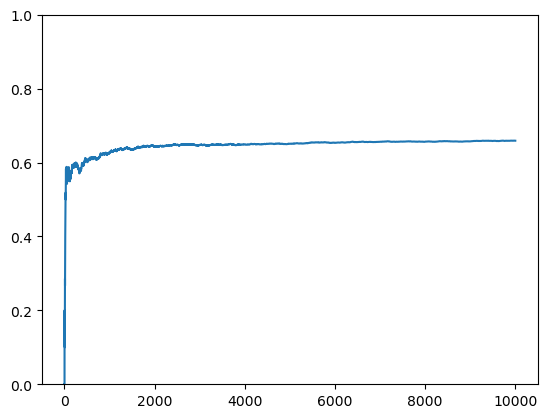

In [10]:
# 톰슨 샘플링
num_of_sel_ts=[0 for i in range(len(slot_prob))]
reward_ts = [[0, 0] for i in range(len(slot_prob))]
avg_reward_ts = [0 for i in range(len(slot_prob))]
total_reward_ts=[]

for i in range(time_step):

    rand_beta = [np.random.beta(reward_ts[sample][0]+1, reward_ts[sample][1]+1) for sample in range(len(slot_prob))]
    selected_arm = np.argmax(rand_beta)
    num_of_sel_ts[selected_arm]+=1

    if slot_prob[selected_arm] > np.random.rand():
        reward_ts[selected_arm][0] += 1
    else:
        reward_ts[selected_arm][1] += 1

    avg_reward_ts[selected_arm] = reward_ts[selected_arm][0]/num_of_sel_ts[selected_arm] if num_of_sel_ts[selected_arm] > 0 else 0

    total_reward_ts.append(sum(reward_ts[j][0] for j in range(len(slot_prob)))/(i+1))

print(num_of_sel_ts)
plt.plot(np.arange(1, time_step+1), total_reward_ts)
plt.ylim([0, 0.7])
plt.show()

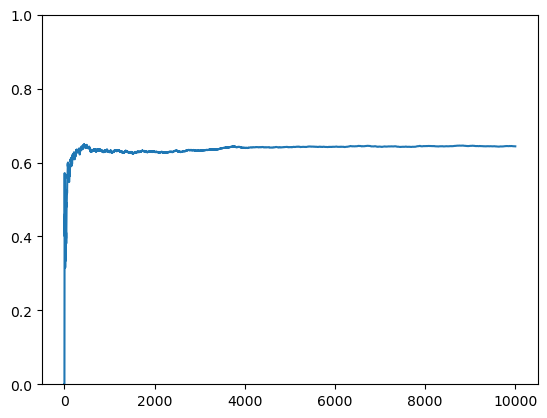

In [11]:
# UCB

num_of_sel_ucb = [0 for i in range(len(slot_prob))]
reward_ucb = [0 for i in range(len(slot_prob))]
avg_reward_ucb = [0 for i in range(len(slot_prob))]
total_reward_ucb = []

score_ucb = [0 for i in range(len(slot_prob))]

for i in range(time_step):

    #update ucb score
    for j in range(len(slot_prob)):
        score_ucb[j] = avg_reward_ucb[j] + np.sqrt(np.log(i+1)/(num_of_sel_ucb[j]+1))
    
    #select action by ucb score
    action = np.argmax(score_ucb)
    num_of_sel_ucb[action]+=1

    #reward
    if slot_prob[action] > np.random.rand():
        reward_ucb[action] += 1
    
    avg_reward_ucb[action] = reward_ucb[action]/num_of_sel_ucb[action] if num_of_sel_ucb[action] > 0 else 0

    total_reward_ucb.append(sum(reward_ucb)/(i+1))

plt.plot(np.arange(1, time_step+1), total_reward_ucb)
plt.ylim([0, 0.7])
plt.show()

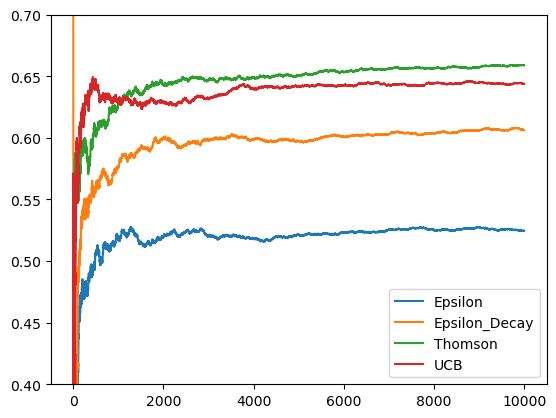

In [16]:
## 전체 시각화
plt.plot([i+1 for i in range(time_step)], total_reward, label='Epsilon')
plt.plot([i+1 for i in range(time_step)], total_reward_decay, label='Epsilon_Decay')
plt.plot(np.arange(1, time_step+1), total_reward_ts, label='Thomson')
plt.plot(np.arange(1, time_step+1), total_reward_ucb, label='UCB')
plt.legend()
plt.ylim([0.4, 0.7])
plt.show()